In [1]:
import numpy as np
import matplotlib

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter
from matplotlib.animation import FFMpegFileWriter
from IPython.display import HTML
matplotlib.use("Agg")
%config InlineBackend.figure_format = 'svg'
#%matplotlib notebook

c:\users\rguo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  # This is added back by InteractiveShellApp.init_path()


In [2]:
tem = 1
L = 10
N = 1
n = N/L
vmax = 5#10 * np.sqrt(tem)
nx = 301
nv = 301
dx = L/(nx-1)
dv = 2*vmax/(nv-1)
x = np.linspace(0,L,num=nx,endpoint=True)
v = np.linspace(-vmax,vmax,num=nv,endpoint=True)
V,X=np.meshgrid(v,x)
max_steps = 1000

path = '../data/'

In [3]:
progesses = np.arange(0,max_steps,1)

f = []

for progess in progesses:
    f_temp = np.loadtxt(os.path.join(path,"data"+str(progess)))
    f.append(f_temp)

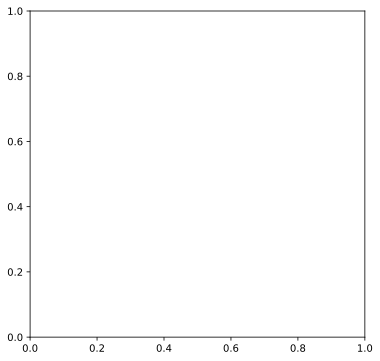

In [4]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot()
writer = FFMpegFileWriter(fps=24,bitrate=-1,codec="libx264")
with writer.saving(fig,"two-stream-instability-vlasov.mp4",dpi=160):
    for frame in range(max_steps):
        Z = f[frame]
        #tol = 1e-160
        #Z[np.less(Z,tol*np.ones(Z.shape))] = 0
        plt.contourf(X,V,Z,levels=20,cmap=cm.plasma,vmin=0,vmax=0.7)
        writer.grab_frame()
        plt.cla()